# ДЗ №4

В качестве заготовки для задания прогоним часть 2ого домашнего задания. Нам необходимо получить разреженные матрицы, используя CountVectorizer, TfidfVectorizer для 'tweet_stemmed' и 'tweet_lemmatized' столбцов (4 матрицы).

In [101]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

import collections
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

from wordcloud import WordCloud


import warnings
warnings.filterwarnings("ignore")

def train_model(vectorizer, classifier, train, valid, field):
    vectorizer.fit(train[field])

    xtrain =  vectorizer.transform(train[field])
    xvalid =  vectorizer.transform(valid[field])    
    
    classifier.fit(xtrain, train['label'])
    
    pred = classifier.predict_proba(xvalid)[:, 1]
    pred = (pred>0.3)*1

    return f1_score(valid['label'], pred)

In [40]:
df = pd.read_pickle('../lesson01/result.pkl.zip', compression='zip')
df = df[['label', 'tweet_stemmed', 'tweet_lemmatized']]
df.tweet_stemmed = df.tweet_stemmed.apply(lambda x: ' '.join(x))
df.tweet_lemmatized = df.tweet_lemmatized.apply(lambda x: ' '.join(x))

df.head()

,label,tweet_stemmed,tweet_lemmatized
0,0.0,father dysfunct selfish drag kid dysfunct run,father dysfunct selfish drag kid dysfunct run
1,0.0,thank lyft credit use caus offer wheelchair va...,thank lyft credit use caus offer wheelchair va...
2,0.0,bihday majesti,bihday majesti
3,0.0,model love take time ur,model love take time ur
4,0.0,factsguid societi motiv,factsguid societi motiv


### Разделим на Train/Valid/Test

In [49]:
train = df[~df.label.isnull()]
test = df[df.label.isnull()]
train, valid = train_test_split(train, test_size=0.2, random_state=42, stratify=train['label'])

In [51]:
train.label.value_counts(normalize=True)

0.0    0.929837
1.0    0.070163
Name: label, dtype: float64

### Задание 1.

Построим модель LogisticRegression, используя Bag-of-Words признаки для столбца combine_df['tweet_stemmed'].

- Поделим Bag-of-Words признаки на train, test (train заканчивается на 31962 строке combine_df)
- Ответами является столбец train_df['label']
- Рассчитаем predict_proba, приведем prediction в в бинарный вид: если предсказание >= 0.3 то 1, иначе 0, тип заменим на int
- Рассчитаем f1_score 

Повторим аналогично для столбца combine_df['tweet_lemmatized'].

In [79]:
train_model(
    CountVectorizer(analyzer='word', token_pattern=r'\w{1,}'),
    LogisticRegression(),
    train,
    valid,
    'tweet_stemmed'
)

0.691086691086691

In [80]:
train_model(
    CountVectorizer(analyzer='word', token_pattern=r'\w{1,}'),
    LogisticRegression(),
    train,
    valid,
    'tweet_lemmatized'
)

0.6902439024390244

### Задание 2.

Построим модель LogisticRegression, используя TF-IDF признаки для столбца combine_df['tweet_stemmed']. 

- Поделим TF-IDF признаки на train, test (train заканчивается на 31962 строке combine_df)
- Ответами является столбец train_df['label']
- Рассчитаем predict_proba, приведем prediction в в бинарный вид: если предсказание >= 0.3 то 1, иначе 0, тип заменим на int
- Рассчитаем f1_score 

Повторим аналогично для столбца combine_df['tweet_lemmatized'].

In [83]:
train_model(
    TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}'),
    LogisticRegression(),
    train,
    valid,
    'tweet_stemmed'
)

0.6244952893674294

In [84]:
train_model(
    TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}'),
    LogisticRegression(),
    train,
    valid,
    'tweet_lemmatized'
)

0.6265060240963854

### Задание 3.

Выведите результаты f1-score всех моделей, сделайте вывод.

> лучше всех отработал **CountVectorizer** для поля **tweet_stemmed**

### Задание 4.

Теперь перейдем к визуализации. Посмотрим, какие слова являются наиболее популярные в датасете с помощью облака слов (WordCloud).
Облако слов - это визуализация, в которой наиболее частые слова большого размера, а менее частые слова меньшего размера.

- объединим слова в одну строку
- создадим словарь частот слов с помощью collections.Counter
- нарисуем облако слов с частотами слов с помощью WordCloud.generate_from_frequencies()
- используем nltk.corpus.stopwords как параметр stopwords, чтобы убрать "мусорные" частотные слова

In [97]:
def showCloud(df):
    words = []
    for line in df['tweet_stemmed']:
        line_words = line.split()
        words.extend(line_words)

    wordfreq = collections.Counter(words)

    wordcloud = WordCloud(
     background_color='white',
     max_words=2000,
     stopwords=stopwords
    ).generate_from_frequencies(wordfreq)

    plt.figure(figsize=(20,20))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()    

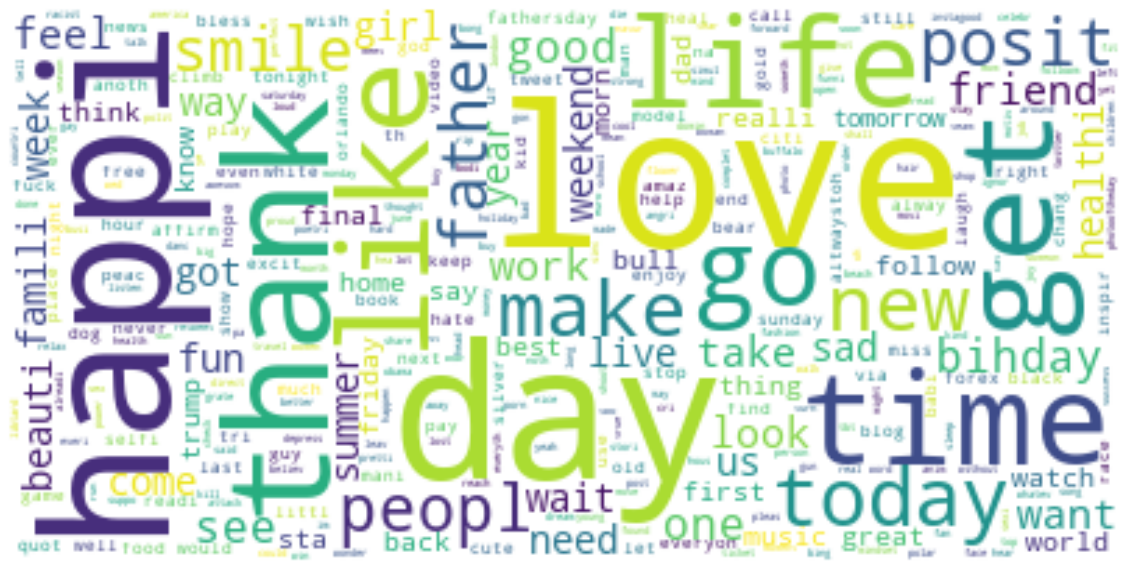

In [98]:
showCloud(df)

### Задание 5.

Теперь отобразим облако слов для отзывов, не содержащих токсичных комментариев (combine_df['label'] == 0). 

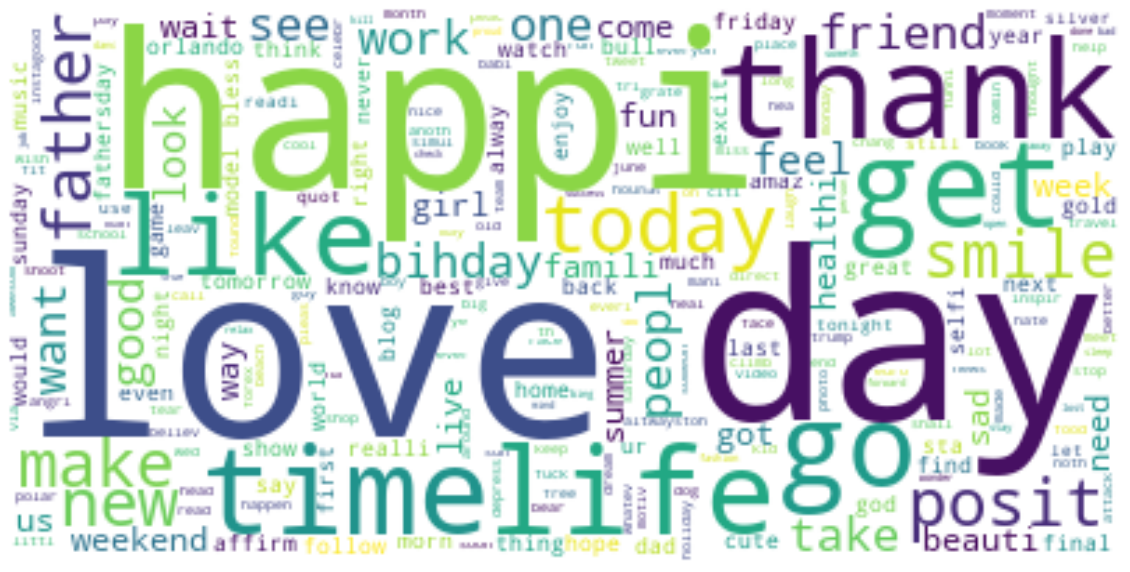

In [99]:
showCloud(df[df['label']==0])

### Задание 6.

Теперь отобразим облако слов для отзывов, содержащих токсичные комментарии (combine_df['label'] == 1). 

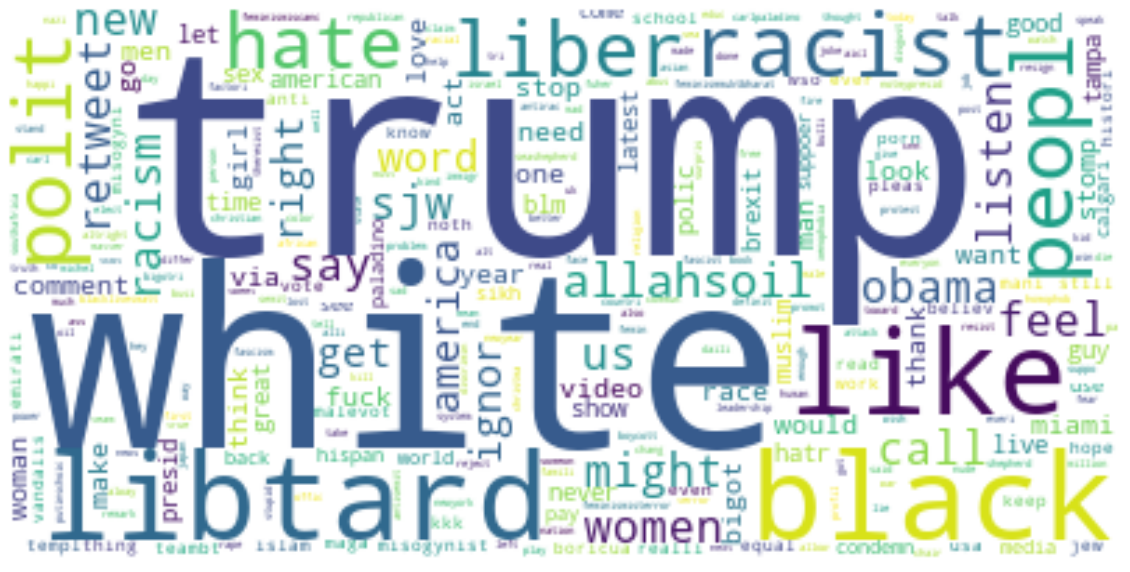

In [100]:
showCloud(df[df['label']==1])